For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



In [3]:
# DATA ANALYSIS AND WRANGLNG
import pandas as pd
import numpy as np 

# VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### IMPORT DATA

In [4]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data description:
1.  _Survival_  - Survival (0 = No; 1 = Yes)
2.  _Pclass_  - Passenger Class (1 = 1st class; 2 = 2nd class; 3 = 3rd class)
3.  _Name_  - Name
4.  _Sex_  - Gender
5.  _Age_  - Age
6.  _Sibsp_  - Number of Siblings/Spouses Aboard
7.  _Parch_  - Number of Parents/Children Aboard
8.  _Ticket_  - Ticket Number
9.  _Fare_  - Passenger Fare
10.  _Cabin_  - Cabin Code
11.  _Embarked_  - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### EXAMINE DATASET

In [7]:
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [81]:
print(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [146]:
# CHECK FOR BASIC STATISTICS
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Glynn, Miss. Mary Agatha",male,NaN,NaN,NaN,CA. 2343,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.265062,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.212184,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,26.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,37.000000,1.000000,0.000000,NaN,31.000000,NaN


Observation:\
There are 891 observations.

In [83]:
# CHECK FOR MISSING DATA
titanic.isnull()

# true = null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [185]:
sns.set(rc={'figure.figsize':(10,7)}) # increase default size of seaborn graphs

[Text(0.5, 1.0, 'Null Values in the Dataset')]

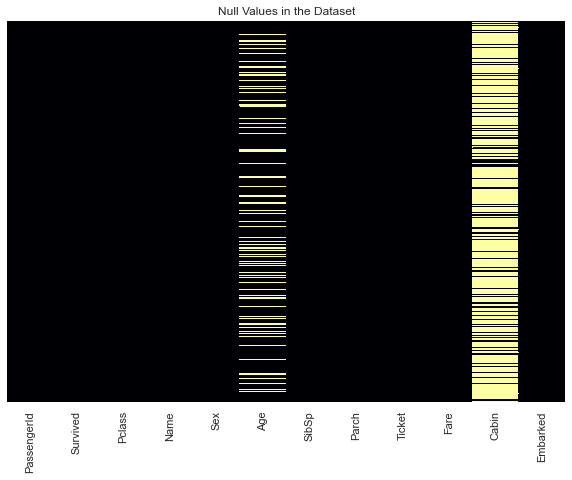

In [166]:
# VISUALIZE WHICH HAS NULL VALUES
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='inferno').set(title='Null Values in the Dataset')

# yellow color = null values

Observation: \
There are alot of missing data especially for the cabin variable compared to the age variable which can be imputated later.

[Text(0.5, 1.0, 'Total Survival Rate')]

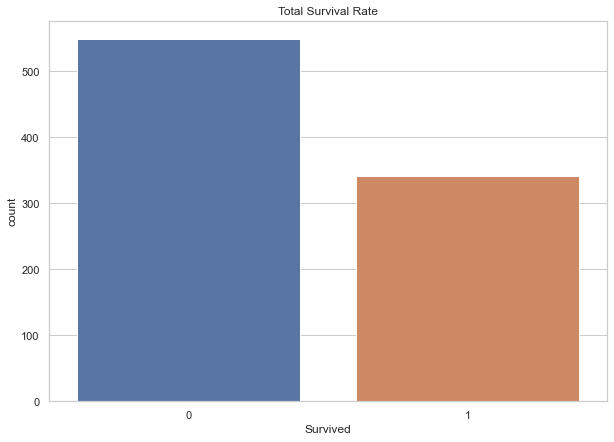

In [167]:
# VISUALIZED HOW MANY HAS SURVIVED
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic).set(title='Total Survival Rate')

In [152]:
survived_data = titanic[titanic['Survived'] == 1]
survived = survived_data.count().values[1]
survival_percent = (survived/891) * 100
print('The total number of people who survived is', survived)
print('The percentage of people who survived is',survival_percent, '%')

The total number of people who survived is 342
The percentage of people who survived is 38.38383838383838 %


Observation: \
Around 340 has survived and around 550 did not survived.

#### *Determine if the survival rate is associated to the gender*

<ipython-input-168-e89845ef1048>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.countplot(x='Survived', hue='Sex', data=titanic, palette ='Set1').set(Title = 'Survival Rate per Gender')


[Text(0.5, 1.0, 'Survival Rate per Gender')]

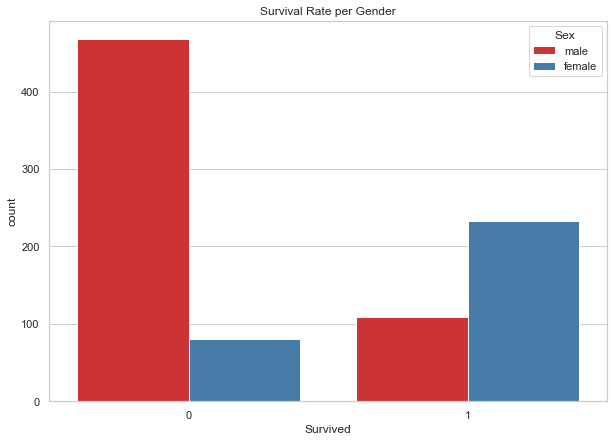

In [168]:
# CHECK SURVIVAL RATE PER GENDER
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic, palette ='Set1').set(Title = 'Survival Rate per Gender')

In [154]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values('Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Observation: \
More male has not survived at 19% compared to female at 74%

#### *Determine if the survival rate is associated to the class of passenger*

<ipython-input-169-4bd04771b4a7>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='Set1').set(Title = 'Survival Rate per Passenger Class')


[Text(0.5, 1.0, 'Survival Rate per Passenger Class')]

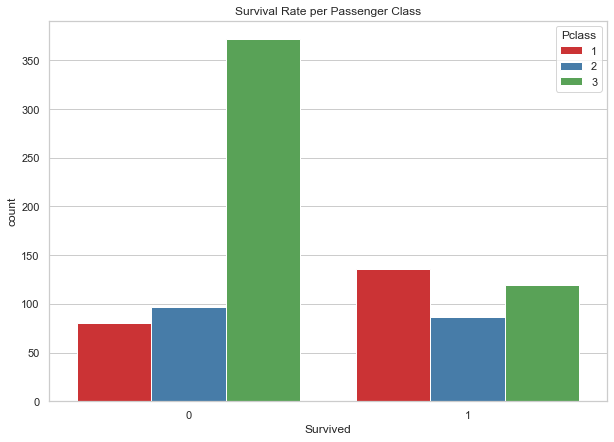

In [169]:
# CHECK SURVIVAL RATE PER PASSENGER CLASS
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=titanic, palette='Set1').set(Title = 'Survival Rate per Passenger Class')

In [216]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values('Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Observation: \
Majority of the passenger in the 3rd class did not survive at 24% compared to class 1 at 63% (highest)

[Text(0.5, 1.0, 'Number of Age of Passenger')]

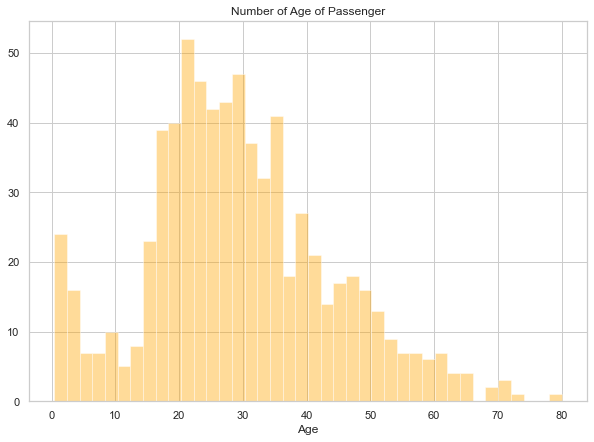

In [172]:
# CHECK THE AVERAGE AGE OF PEOPLE THROUGH A HISTOGRAM GRAPH
sns.distplot(titanic['Age'].dropna(), kde=False, color='orange', bins=40).set(title ='Number of Age of Passenger') 
# use bin 40 since max age is 80

Observation:\
Most of the passengers are between 20 to 30 years old.

[Text(0.5, 1.0, 'Number of Siblings or Spouse each Passengers')]

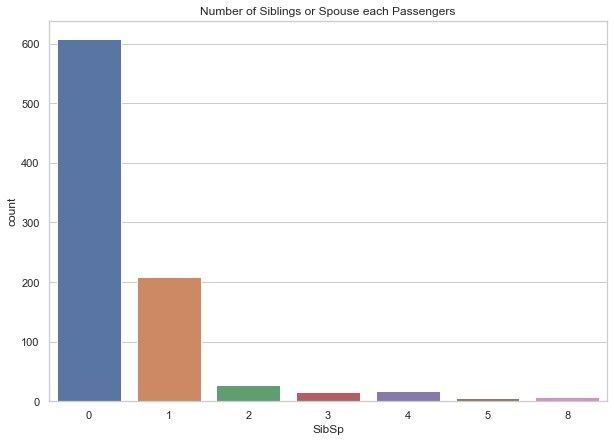

In [173]:
# CHECK HOW SIBLING OR SPOUSE EACH PASSENGERS HAD
sns.countplot(x='SibSp', data=titanic).set(title ='Number of Siblings or Spouse each Passengers')

Observations:\
Majority had board the ship alone at around 600 people.

[Text(0.5, 1.0, 'Average Fare of the Ticket')]

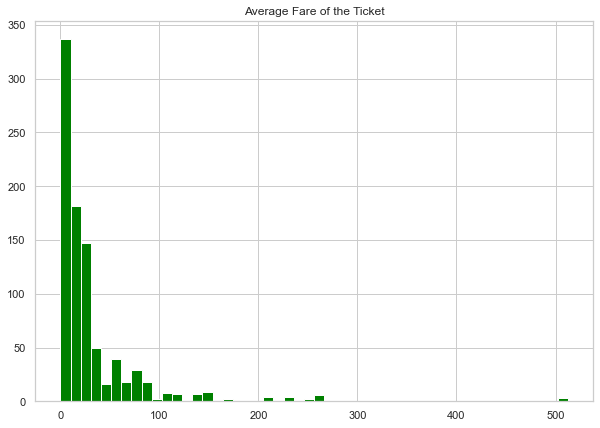

In [177]:
# CHECK WHAT IS THE AVERAGE FARE FOR THE TICKET
titanic['Fare'].hist(color='green', bins=50, figsize=(10,7)).set(title = 'Average Fare of the Ticket')

Observation:\
Fare average less than 50.

### DATA CLEANING

Since there is a lot of missing data especially for the age, this could be either dropped or replaced with mean value. For this exercise we can use the mean value by through the cabin class variable.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

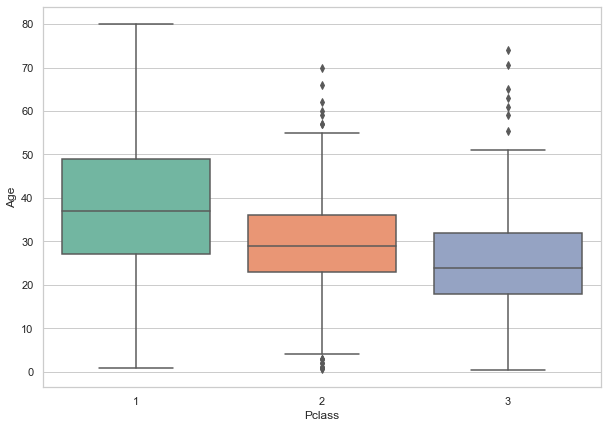

In [127]:
# VISUALIZE THROUGH BOX PLOT AVERAGE AGE PER CLASS
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y ='Age', data=titanic, palette = 'Set2')

In [128]:
# CHECK AVERAGE AGE PER CLASS
titanic[['Pclass', 'Age']].groupby(['Pclass'], as_index = False).mean().sort_values('Age', ascending = False)

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [131]:
# CREATE FUNCTION TO IMPUTE THE MISSING DATA BASED ON AVERAGE AGE PER CLASS
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    '''if age value is null replace with the following'''
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [137]:
# APPLY THE FUNCTION TO THE DATASET
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

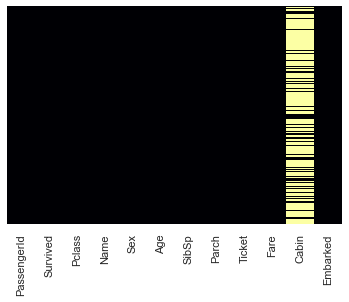

In [136]:
# CHECK WITH HEAT MAP FOR NULL VALUES
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = 'inferno')

In [138]:
# THE CABIN COLUMN WILL BE DROPPED SINCE IT HAS A LOT OF MISSING VALUES. THIS WILL BE EXCLUDED FROM THE ANALYSIS
titanic.drop('Cabin', axis = 1, inplace = True)

In [139]:
# CHECK IF THE COLUMN HAS BEEN REMOVED
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### *Determine the survival rate is associated to the age*

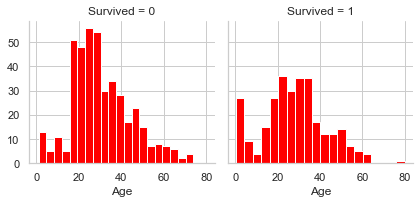

In [204]:
#  CHECK SURVIVAL RATE PER AGE THROUGH HISTOGRAM
sns.set_style('whitegrid')
sAge = sns.FacetGrid(titanic, col = 'Survived')
sAge.map(plt.hist, 'Age', bins = 20, color = 'red')


[Text(0.5, 1.0, 'Survival Rate by Age')]

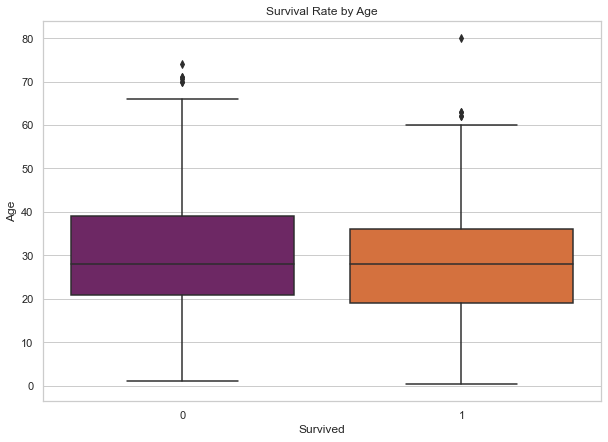

In [209]:
# BOXPLOT FOR SURVIVAL RATE
plt.figure(figsize=(10,7))
sns.boxplot(x= 'Survived', y = 'Age', data=titanic, palette = 'inferno').set(title = 'Survival Rate by Age')

In [208]:
titanic[['Survived', 'Age']].groupby(['Survived'], as_index = True).mean().sort_values('Age', ascending = False)

,Age
Survived,
0,30.626179
1,28.343690


Observation:\
People with lower age survived with an average age of 28.

#### *Survival rate based on Gender and Passenger Class*

[Text(0.5, 1.0, 'Survival Rate based on Passenger Class and Gender')]

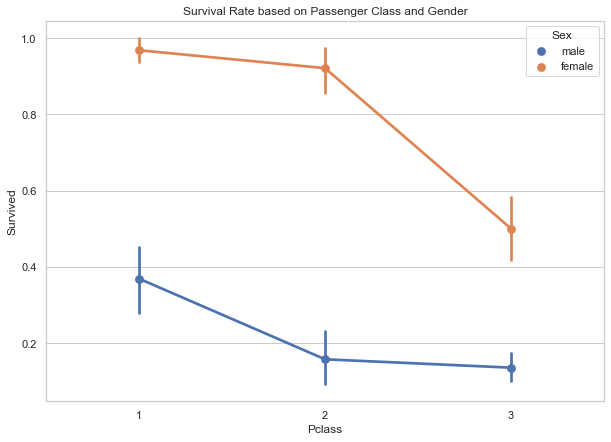

In [212]:
# CHECK IF SURVIVAL RATE IS ASSOCIATED WITH GENDER AND PASSENGER CLASS

plt.figure(figsize = (10,7))
sns.set_style('whitegrid')
sns.pointplot(data = titanic, x = 'Pclass', y = 'Survived', hue = 'Sex').set(title = 'Survival Rate based on Passenger Class and Gender')

In [213]:
titanic[['Survived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

ObservationL:\
Highest survival rate are the females at class 1 at 96.8% compared to female at lowest class at 50%. However, for male at the upper class has a lower survival rate at 36.8%

### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 